# Code for BMJ talk

Produce a series of plots in the SIR(S) framework with optional seasonality and vaccination


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
def sirs_dx(t,x,beta0,A,gamma,omega,V):
    yr = t/365.0
    beta = beta0 + A*np.cos(2.0*np.pi*yr)
    if (x[0] > 0):
        vv = V
    else:
        vv = 0.
    dx = np.zeros(3)
    dx[0] = -beta*(x[0])*(x[1]) + omega*x[2] - vv
    dx[1] = beta*(x[0])*(x[1]) - gamma*x[1]
    dx[2] = gamma*x[1] - omega*x[2] + vv
    return dx

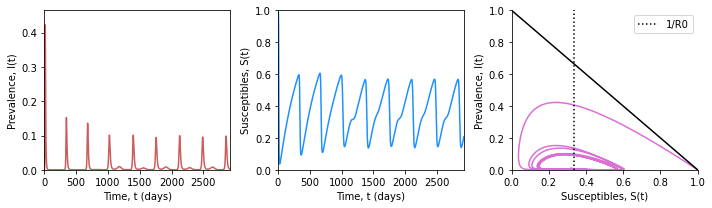

In [3]:
beta0 = 0.6
A = 0.25
gamma = 0.2
R0 = beta0/gamma
omega = 0.003
V = 0.
i0 = 0.0001
tmax = 8*365.0
odefun = lambda t,x: sirs_dx(t,x,beta0,A,gamma,omega,V)
sol = integrate.solve_ivp(odefun,
                          (0.0,tmax), #t_eval
                          np.array([1.-i0, i0, 0.0]), #initial conditions
                          'RK45',
                          atol=1e-12,
                          rtol=1e-12,
                         )
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(sol.t,(sol.y[1]).T, c='indianred')
plt.xlabel('Time, t (days)')
plt.ylabel('Prevalence, I(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,1.1*np.max(sol.y[1])])
plt.subplot(1,3,2)
plt.plot(sol.t,(sol.y[0]).T, c='dodgerblue')
plt.xlabel('Time, t (days)')
plt.ylabel('Susceptibles, S(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,1])
ax = plt.subplot(1,3,3)
plt.plot(sol.y[0].T,sol.y[1].T, c='orchid')
plt.plot([1,0],[0,1],c='k')
plt.plot((1/R0)*np.ones(2),[0,1],c='k',ls=':',label='1/R0')
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Susceptibles, S(t)')
plt.ylabel('Prevalence, I(t)')
plt.tight_layout()
plt.savefig('./bmjfigs/endemic.pdf')

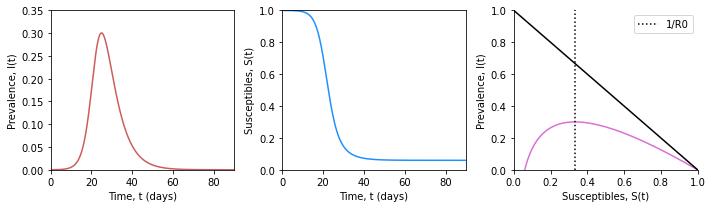

In [4]:
beta0 = 0.6
A = 0.
gamma = 0.2
R0 = beta0/gamma
omega = 0.00
V = 0.
i0 = 0.0001
tmax = 90
odefun = lambda t,x: sirs_dx(t,x,beta0,A,gamma,omega,V)
sol = integrate.solve_ivp(odefun,
                          (0.0,tmax), #t_eval
                          np.array([1.-i0, i0, 0.0]), #initial conditions
                          'RK45',
                          atol=1e-12,
                          rtol=1e-12,
                         )
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(sol.t,(sol.y[1]).T, c='indianred')
plt.xlabel('Time, t (days)')
plt.ylabel('Prevalence, I(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,0.35])
plt.subplot(1,3,2)
plt.plot(sol.t,(sol.y[0]).T, c='dodgerblue')
plt.xlabel('Time, t (days)')
plt.ylabel('Susceptibles, S(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,1])
ax = plt.subplot(1,3,3)
plt.plot(sol.y[0].T,sol.y[1].T, c='orchid')
plt.plot([1,0],[0,1],c='k')
plt.plot((1/R0)*np.ones(2),[0,1],c='k',ls=':',label='1/R0')
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Susceptibles, S(t)')
plt.ylabel('Prevalence, I(t)')
plt.tight_layout()
plt.savefig('./bmjfigs/freefall.pdf')

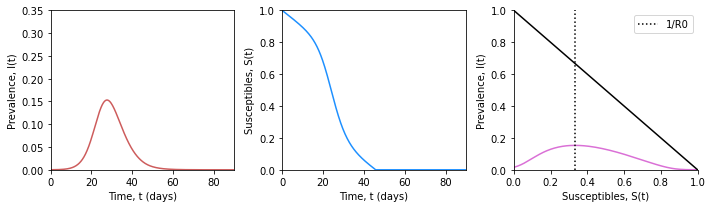

In [5]:
beta0 = 0.6
A = 0.
gamma = 0.2
R0 = beta0/gamma
omega = 0.00
V = 0.01
i0 = 0.0001
tmax = 90
odefun = lambda t,x: sirs_dx(t,x,beta0,A,gamma,omega,V)
sol = integrate.solve_ivp(odefun,
                          (0.0,tmax), #t_eval
                          np.array([1.-i0, i0, 0.0]), #initial conditions
                          'RK45',
                          atol=1e-12,
                          rtol=1e-12,
                         )
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(sol.t,(sol.y[1]).T, c='indianred')
plt.xlabel('Time, t (days)')
plt.ylabel('Prevalence, I(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,0.35])
plt.subplot(1,3,2)
plt.plot(sol.t,(sol.y[0]).T, c='dodgerblue')
plt.xlabel('Time, t (days)')
plt.ylabel('Susceptibles, S(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,1])
ax = plt.subplot(1,3,3)
plt.plot(sol.y[0].T,sol.y[1].T, c='orchid')
plt.plot([1,0],[0,1],c='k')
plt.plot((1/R0)*np.ones(2),[0,1],c='k',ls=':',label='1/R0')
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Susceptibles, S(t)')
plt.ylabel('Prevalence, I(t)')
plt.tight_layout()
plt.savefig('./bmjfigs/vacc.pdf')

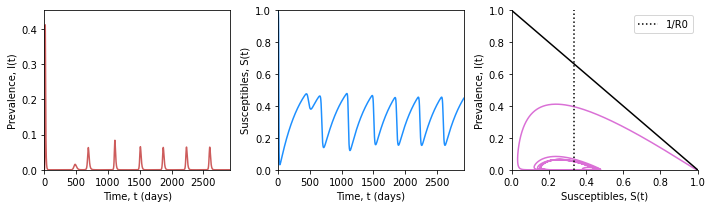

In [6]:
beta0 = 0.6
A = 0.25
gamma = 0.2
R0 = beta0/gamma
omega = 0.003
V = 0.001
i0 = 0.0001
tmax = 8*365.0
odefun = lambda t,x: sirs_dx(t,x,beta0,A,gamma,omega,V)
sol = integrate.solve_ivp(odefun,
                          (0.0,tmax), #t_eval
                          np.array([1.-i0, i0, 0.0]), #initial conditions
                          'RK45',
                          atol=1e-12,
                          rtol=1e-12,
                         )
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(sol.t,(sol.y[1]).T, c='indianred')
plt.xlabel('Time, t (days)')
plt.ylabel('Prevalence, I(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,1.1*np.max(sol.y[1])])
plt.subplot(1,3,2)
plt.plot(sol.t,(sol.y[0]).T, c='dodgerblue')
plt.xlabel('Time, t (days)')
plt.ylabel('Susceptibles, S(t)')
plt.xlim([0.,tmax])
plt.ylim([0.,1])
ax = plt.subplot(1,3,3)
plt.plot(sol.y[0].T,sol.y[1].T, c='orchid')
plt.plot([1,0],[0,1],c='k')
plt.plot((1/R0)*np.ones(2),[0,1],c='k',ls=':',label='1/R0')
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Susceptibles, S(t)')
plt.ylabel('Prevalence, I(t)')
plt.tight_layout()
plt.savefig('./bmjfigs/endemic_vacc.pdf')